In [1]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
#Child age range 0-10, Teen age range 11-17
#All data reflected is killed by gun incident
child = pd.read_csv('children.csv')
teen = pd.read_csv('teen.csv')

In [3]:
child.rename(columns={'# Killed': 'children-killed', '# Injured': 'children-injured'}, inplace=True)
teen.rename(columns={'# Killed': 'teen-killed', '# Injured': 'teen-injured'}, inplace=True)

In [4]:
child.drop(['Incident ID', 'Incident Date','City Or County','Operations','Address'], axis = 1, inplace = True) 
teen.drop(['Incident ID', 'Incident Date','City Or County','Operations','Address'], axis = 1, inplace = True) 

In [5]:
grp_child = child.groupby(['State'])['children-killed','children-injured'].sum()
grp_teen = teen.groupby(['State'])['teen-killed','teen-injured'].sum()

C:\Users\tinph\AppData\Local\Temp\ipykernel_36592\4011172287.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_child = child.groupby(['State'])['children-killed','children-injured'].sum()
C:\Users\tinph\AppData\Local\Temp\ipykernel_36592\4011172287.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_teen = teen.groupby(['State'])['teen-killed','teen-injured'].sum()


In [6]:
#Texas has highest incidents 
df = pd.concat([grp_child, grp_teen],axis=1)
df

,children-killed,children-injured,teen-killed,teen-injured
State,,,,
Alabama,76.0,13.0,72.0,19.0
Alaska,31.0,0.0,9.0,0.0
Arizona,73.0,12.0,52.0,18.0
Arkansas,57.0,5.0,31.0,2.0
California,159.0,47.0,148.0,41.0
Colorado,51.0,0.0,48.0,22.0
Connecticut,32.0,2.0,14.0,1.0
Delaware,5.0,0.0,4.0,3.0
District of Columbia,7.0,9.0,21.0,7.0


In [7]:
#Years: 2014 - Dec 2022, updates on a weekly basis. 
df.replace(np.nan, 0, inplace = True)
df.sort_values(by=['children-killed'], ascending=False)

,children-killed,children-injured,teen-killed,teen-injured
State,,,,
Texas,375.0,71.0,271.0,43.0
Florida,202.0,37.0,130.0,33.0
California,159.0,47.0,148.0,41.0
Missouri,150.0,25.0,63.0,15.0
Ohio,148.0,36.0,106.0,29.0
Georgia,137.0,16.0,131.0,44.0
South Carolina,126.0,21.0,71.0,17.0
North Carolina,117.0,27.0,121.0,38.0
Michigan,115.0,19.0,64.0,22.0


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaled_data1 = scaler.fit_transform(df.iloc[: , 1:])

In [10]:
pca1 = PCA(n_components=2)
pca_transformed_data1 = pca1.fit_transform(scaled_data1)
pca1.explained_variance_ratio_.sum()

0.9904618125129161

In [11]:
pca1.explained_variance_ratio_

array([0.91734073, 0.07312108])

In [12]:
# Transform PCA data to a DataFrame
df3 = pd.DataFrame(
    data=pca_transformed_data1, columns=["Children", "Teenager"]
)
df3.head()

,Children,Teenager
0,0.642605,-0.162390
1,-1.380301,0.139801
2,0.333605,-0.165551
3,-0.843697,0.294960
4,3.797236,0.449082


c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

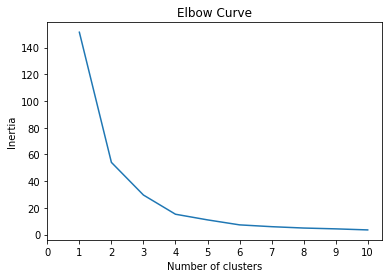

In [13]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df3)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df3)

# Predict clusters
predictions = model.predict(df3)

# Add the predicted class column to the dataframe
df3["class"] = model.labels_
df3.head()

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Children,Teenager,class
0,0.642605,-0.162390,2
1,-1.380301,0.139801,0
2,0.333605,-0.165551,2
3,-0.843697,0.294960,0
4,3.797236,0.449082,1


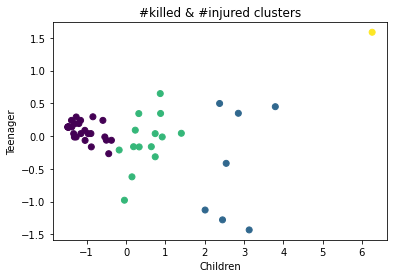

In [15]:
plt.scatter(x=df3['Children'], y=df3['Teenager'], c=df3['class'])
plt.xlabel('Children')
plt.ylabel('Teenager')
plt.title('#killed & #injured clusters')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score
sil_avg = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for s in range_n_clusters:
 kmeans = KMeans(n_clusters = s).fit(df3)
 labels = kmeans.labels_
 sil_avg.append(silhouette_score(df3, labels, metric = 'euclidean'))

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

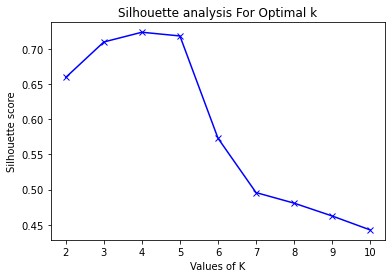

In [17]:
plt.plot(range_n_clusters,sil_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Using the above Silhouette analysis, we can choose K’s optimal value as 4 because the average silhouette score is higher and indicates that the data points are optimally positioned. 
So the number of group data we define are 4 include children/teen killed/injured